In [1]:
import numpy as np
from scipy.linalg import toeplitz
from matplotlib import pyplot as plt

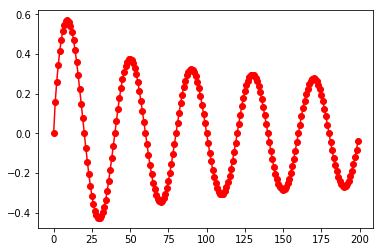

In [11]:
# rad
s = np.sin(2 * np.pi * 0.025 * np.arange(200))/(np.arange(200)**0.25+1e-8)
plt.plot(s, 'ro-')
#plt.xlim(-0.5, 20.5)
#plt.ylim(-1.1, 1.1)
plt.show()

(198, 3, 1) (198,)


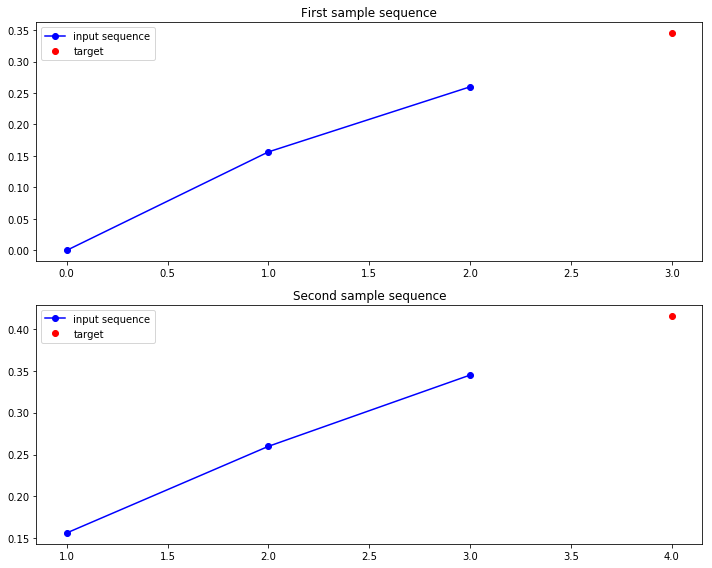

In [12]:
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))
S[:5, :3]

X_train = S[:-1, :3][:, :, np.newaxis]
Y_train = S[:-1, 3]
print(X_train.shape, Y_train.shape)

plt.figure(figsize=(10, 8))
plt.subplot(211)
plt.plot([0, 1, 2], X_train[0].flatten(), 'bo-', label="input sequence")
plt.plot([3], Y_train[0], 'ro', label="target")
#plt.xlim(-0.5, 4.5)
#plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("First sample sequence")
plt.subplot(212)
plt.plot([1, 2, 3], X_train[1].flatten(), 'bo-', label="input sequence")
plt.plot([4], Y_train[1], 'ro', label="target")
#plt.xlim(-0.5, 4.5)
#plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Second sample sequence")
plt.tight_layout()
plt.show()

In [13]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

np.random.seed(0)
model = Sequential()
model.add(SimpleRNN(10, input_shape=(3, 1)))
model.add(Dense(1, activation="linear"))
model.compile(loss='mse', optimizer='sgd')

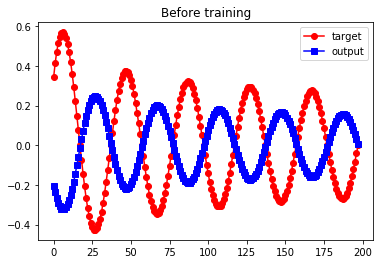

In [14]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label="output")
#plt.xlim(-0.5, 20.5)
#plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

Epoch 1/100
198/198 [==============================] - 1s 4ms/step - loss: 0.1553
Epoch 2/100
198/198 [==============================] - 0s 135us/step - loss: 0.1344
Epoch 3/100
198/198 [==============================] - 0s 148us/step - loss: 0.1175
Epoch 4/100
198/198 [==============================] - 0s 150us/step - loss: 0.1035
Epoch 5/100
198/198 [==============================] - 0s 145us/step - loss: 0.0907
Epoch 6/100
198/198 [==============================] - 0s 145us/step - loss: 0.0804
Epoch 7/100
198/198 [==============================] - 0s 139us/step - loss: 0.0710
Epoch 8/100
198/198 [==============================] - 0s 158us/step - loss: 0.0639
Epoch 9/100
198/198 [==============================] - 0s 159us/step - loss: 0.0576
Epoch 10/100
198/198 [==============================] - 0s 141us/step - loss: 0.0521
Epoch 11/100
198/198 [==============================] - 0s 140us/step - loss: 0.0471
Epoch 12/100
198/198 [==============================] - 0s 144us/step - loss

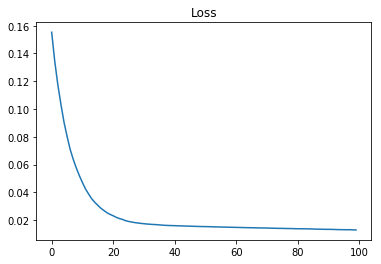

In [15]:
history = model.fit(X_train, Y_train, epochs=100)

plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()

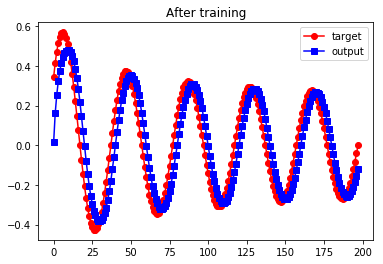

In [16]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label="output")
#plt.xlim(-0.5, 20.5)
#plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()